In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# GOAL: Create a model to predict whether or not a customer will Churn 

In [142]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [144]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# Exploratary

<AxesSubplot:xlabel='Churn', ylabel='count'>

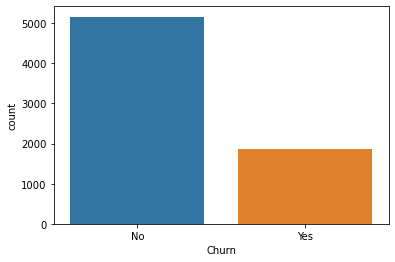

In [146]:
sns.countplot(data=df,x="Churn")

<AxesSubplot:>

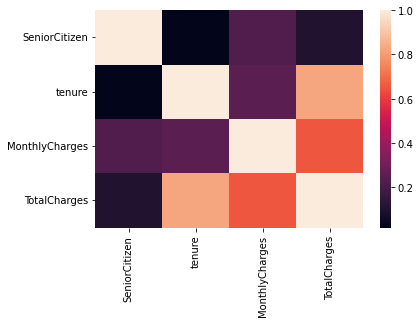

In [147]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

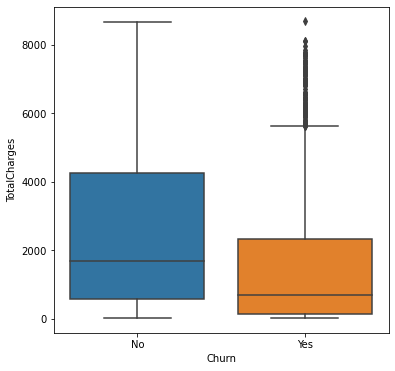

In [148]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="Churn",y="TotalCharges")

In [149]:
new=pd.get_dummies(df.drop(columns="customerID"),drop_first=True)
new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [150]:
new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.504693,0.482509,0.298493,0.903299,0.096701,0.421928,...,0.384386,0.216155,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.499729,0.457629,0.295571,0.295571,0.493902,...,0.486484,0.411650,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

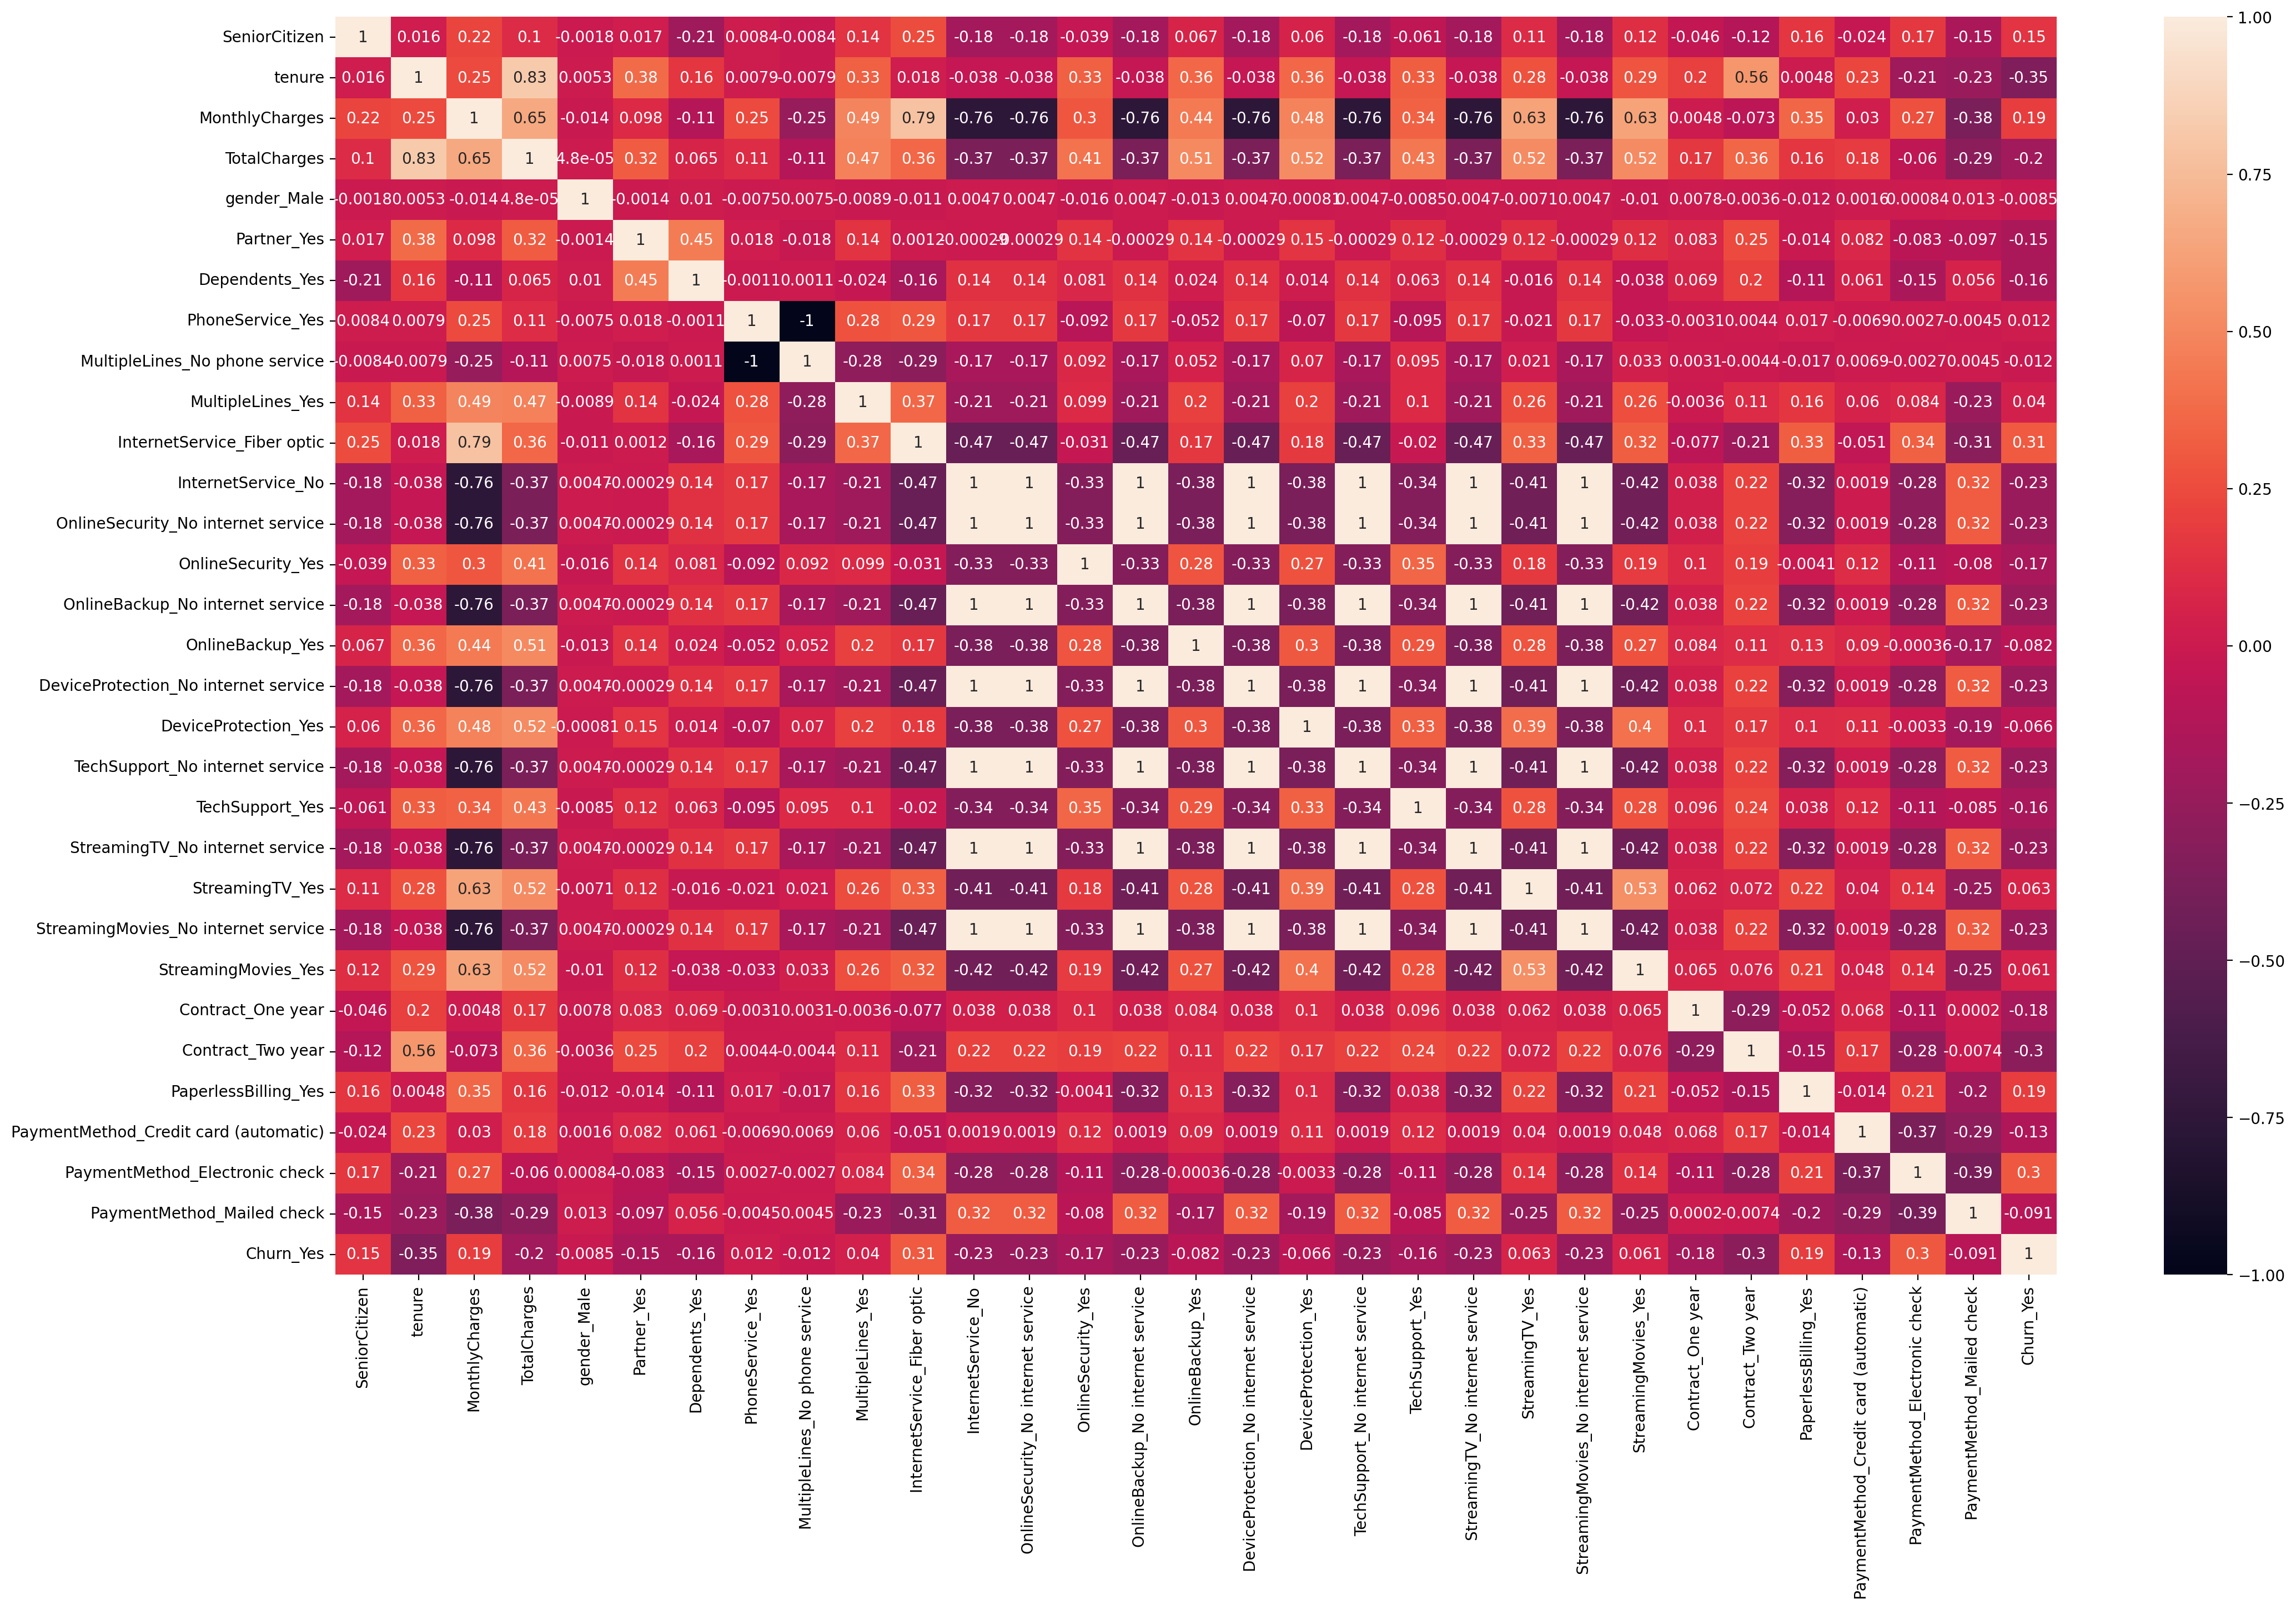

In [151]:
plt.figure(figsize=(25,15),dpi=200)
sns.heatmap(new.corr(),annot=True)

In [152]:
corr=new.corr()[["Churn_Yes"]].drop(index="Churn_Yes").sort_values(by="Churn_Yes",ascending=False)
corr

,Churn_Yes
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
MonthlyCharges,0.192858
PaperlessBilling_Yes,0.191454
SeniorCitizen,0.150541
StreamingTV_Yes,0.063254
StreamingMovies_Yes,0.060860
MultipleLines_Yes,0.040033
PhoneService_Yes,0.011691
gender_Male,-0.008545


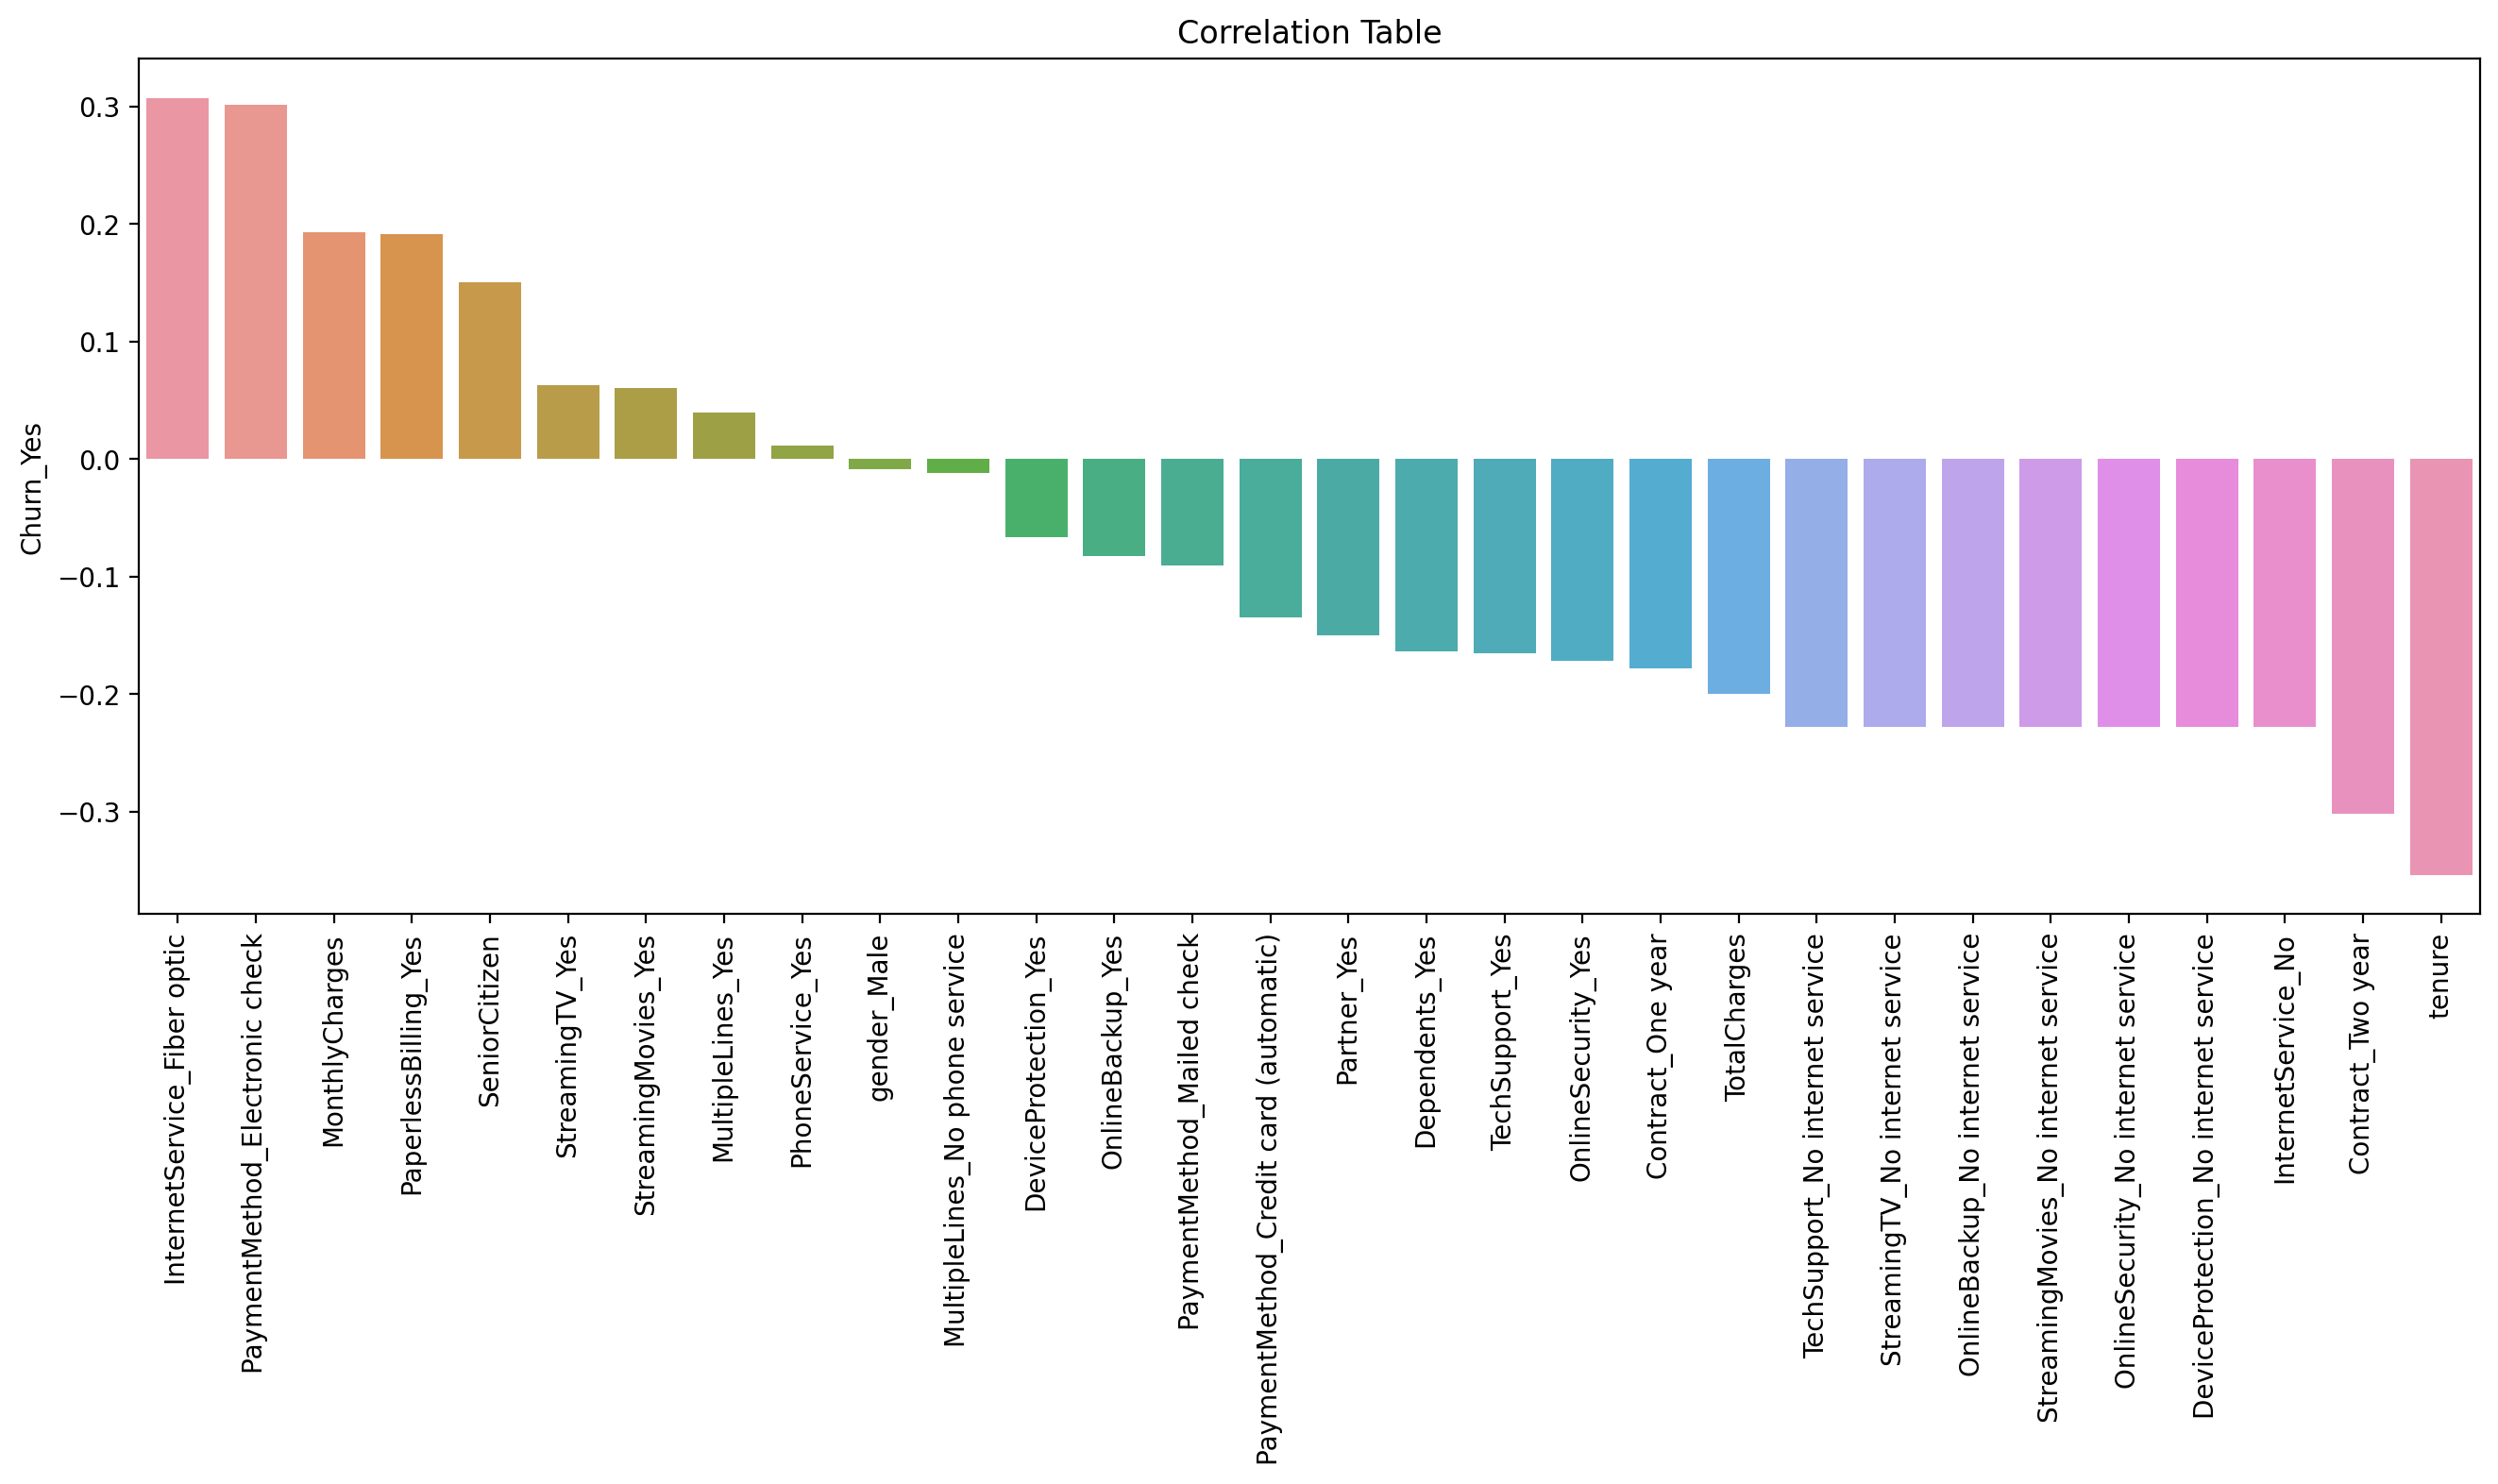

In [153]:
plt.figure(figsize=(16,6),dpi=200)
sns.barplot(data=corr,x=corr.index,y="Churn_Yes")
plt.xticks(rotation=90)
plt.title("Correlation Table");

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

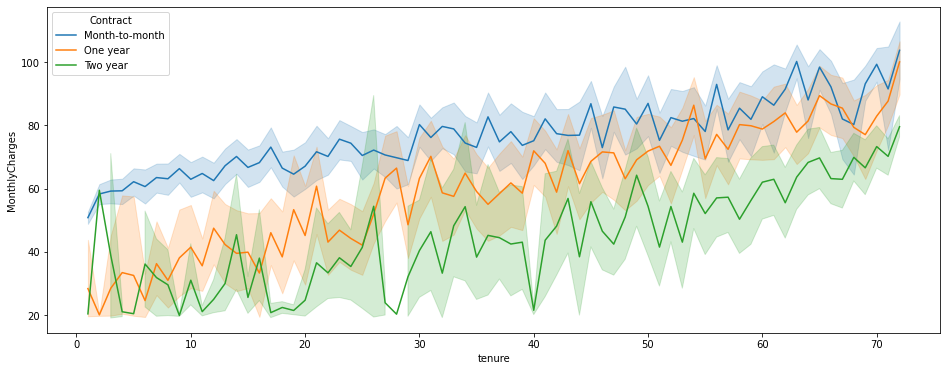

In [154]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,x="tenure",y="MonthlyCharges",hue="Contract")


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

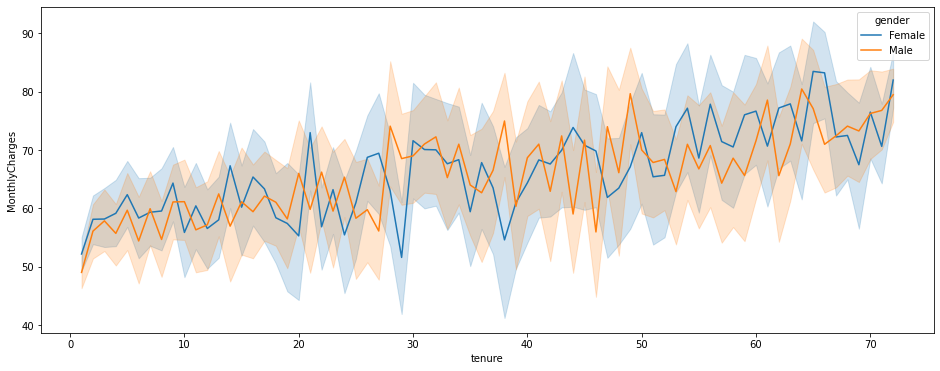

In [155]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,x="tenure",y="MonthlyCharges",hue="gender")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

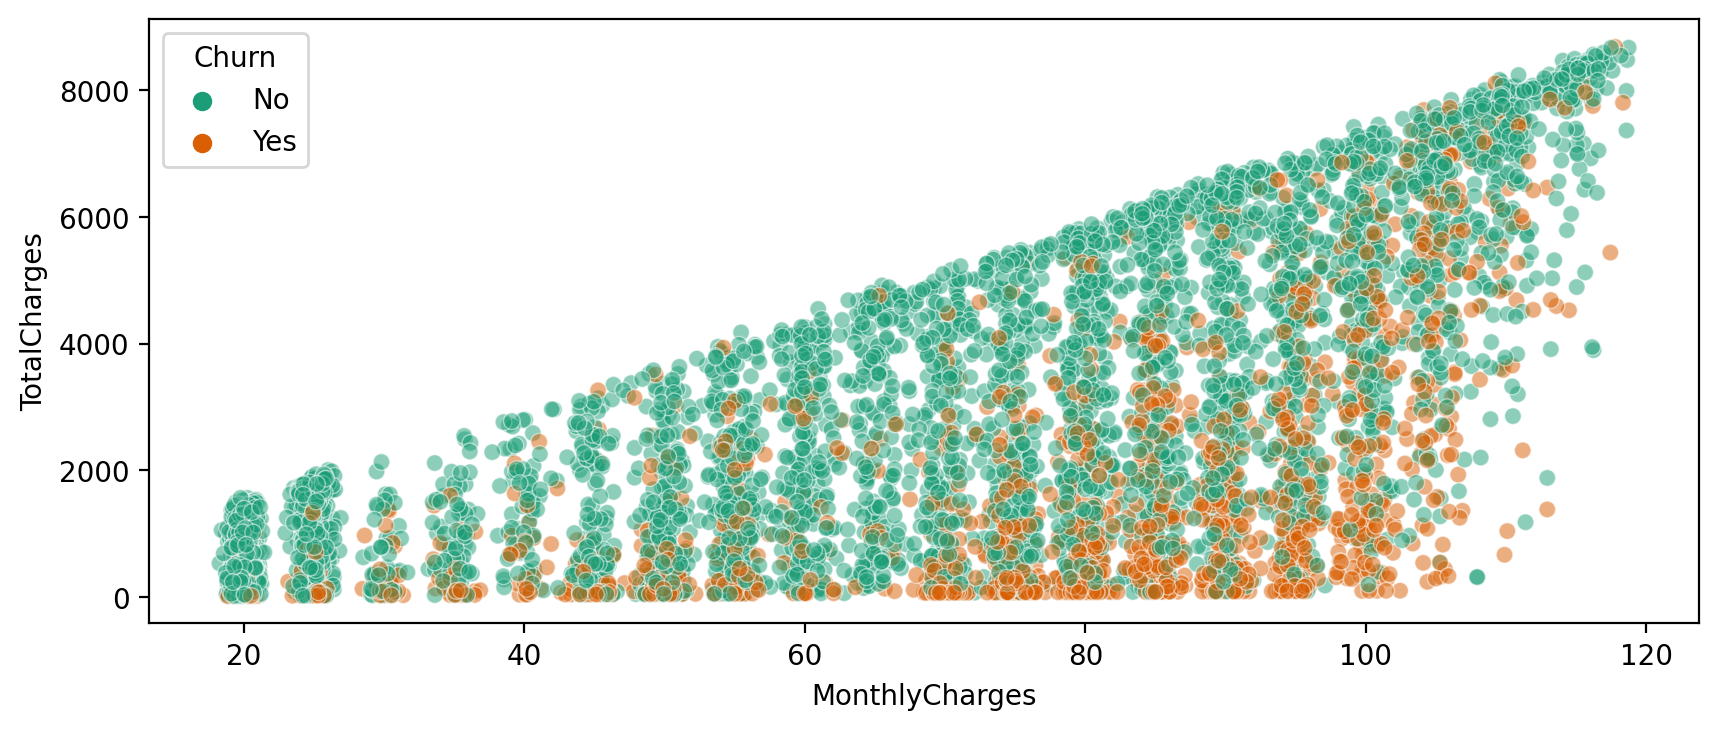

In [156]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

# Machine Learning

# Model1

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X=pd.get_dummies(df.drop(columns=["Churn","customerID"]),drop_first=True)
y=df["Churn"]

In [159]:
len(X)

7032

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=101)

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
model=DecisionTreeClassifier(class_weight="balanced")

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid={"max_depth":[2,5,8,13,20],"criterion":["gini","entropy"],"max_leaf_nodes":[2,5,8,12,15]}

In [165]:
grid=GridSearchCV(model,param_grid)

In [166]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 8, 13, 20],
                         'max_leaf_nodes': [2, 5, 8, 12, 15]})

In [167]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 5}

In [168]:
model=DecisionTreeClassifier(class_weight="balanced",max_depth=5,max_leaf_nodes=5)

In [169]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=5)

In [170]:
from sklearn.tree import plot_tree

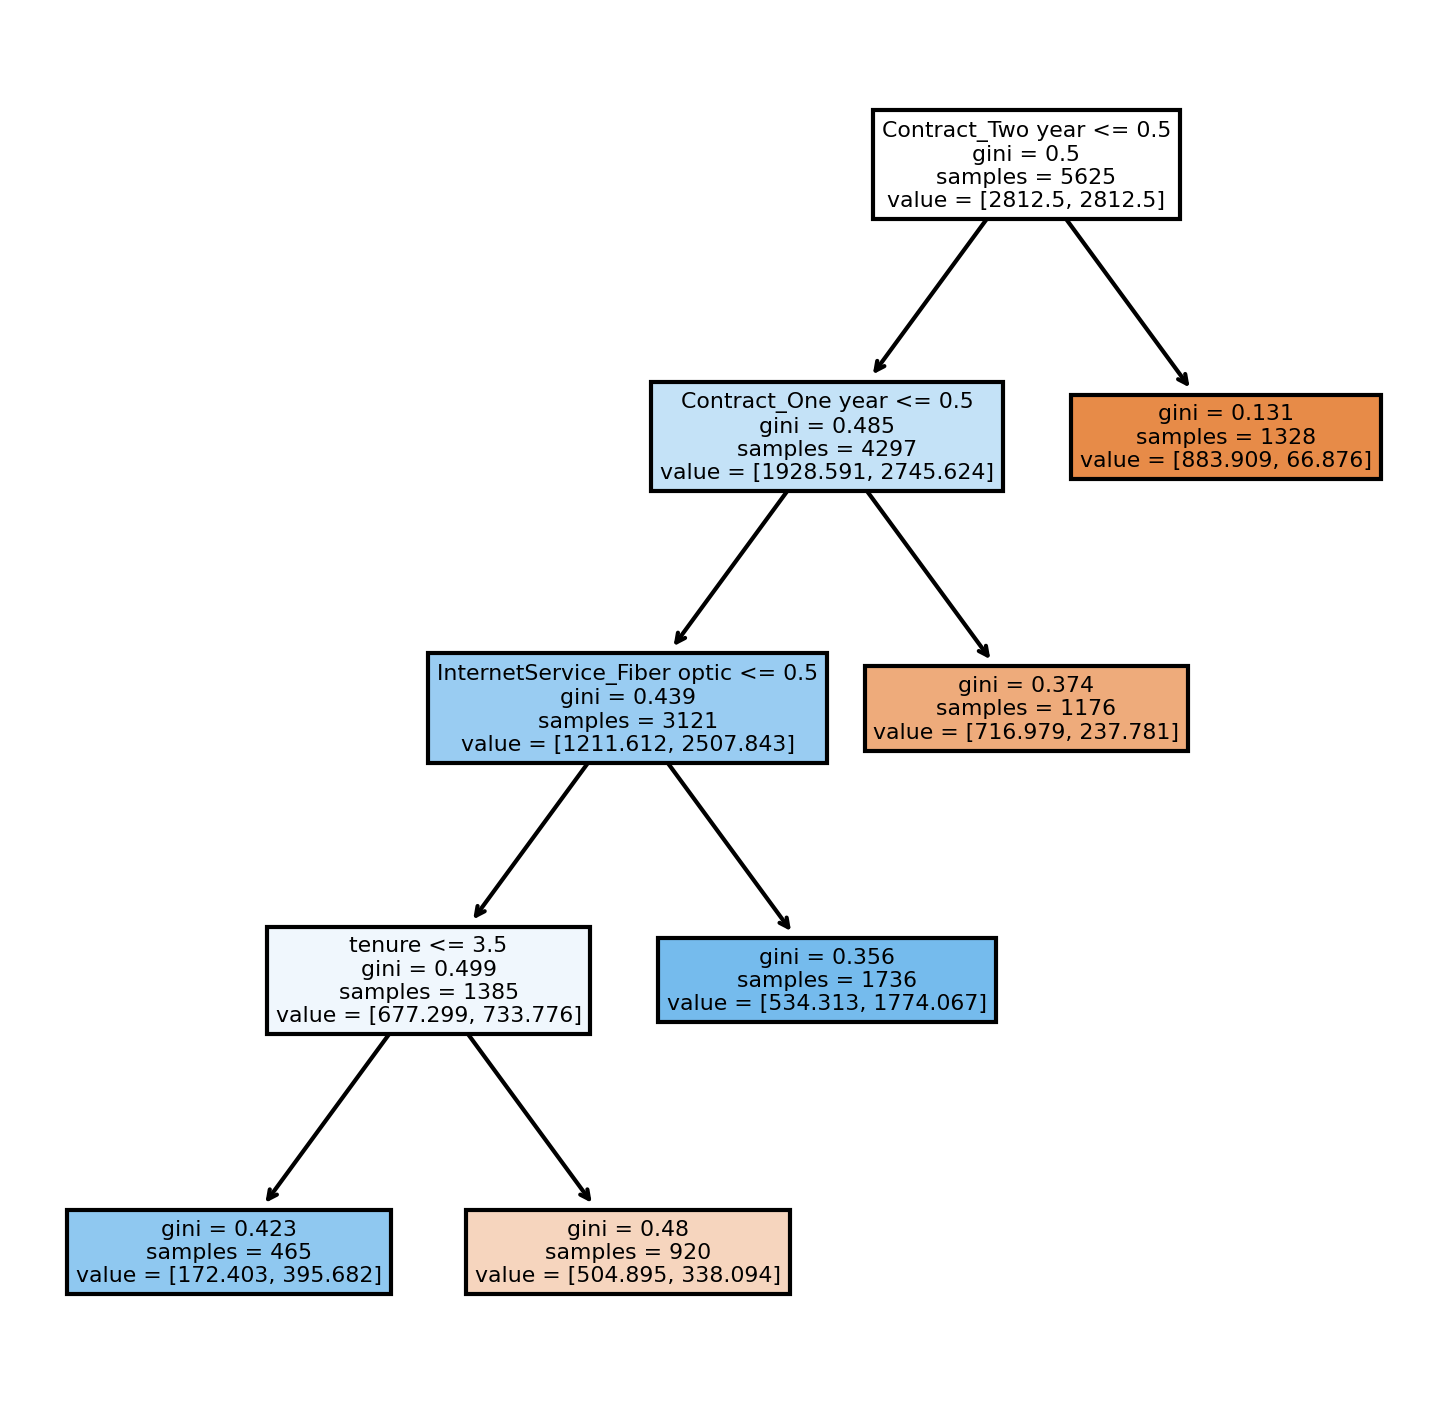

In [171]:
plt.figure(figsize=(6,6),dpi=300)
plot_tree(model,filled=True,feature_names=X.columns);

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [173]:
y_pred=model.predict(X_test)

In [174]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.7434257285003554

# Model2

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
modell=RandomForestClassifier()

In [177]:
param={"n_estimators":[64,80,100,120,150],"class_weight":[None,"balanced"]}

In [178]:
gridd=GridSearchCV(modell,param)

In [179]:
gridd.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'n_estimators': [64, 80, 100, 120, 150]})

In [180]:
gridd.best_params_

{'class_weight': None, 'n_estimators': 64}

In [181]:
modell=RandomForestClassifier(class_weight="balanced",n_estimators=80)

In [182]:
modell.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=80)

In [183]:
y_predd=modell.predict(X_test)

In [184]:
accuracy_score(y_predd,y_test)

0.7889125799573561

In [185]:
pd.DataFrame(index=X.columns,data=modell.feature_importances_,columns=['Importance']).sort_values(ascending=False,by="Importance")

,Importance
TotalCharges,0.175124
tenure,0.166914
MonthlyCharges,0.151310
Contract_Two year,0.066951
PaymentMethod_Electronic check,0.039192
InternetService_Fiber optic,0.037588
Contract_One year,0.032057
OnlineSecurity_Yes,0.025975
gender_Male,0.025478
PaperlessBilling_Yes,0.024796


In [186]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

def compare_models(model1, model2, X_test):
    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)
    print("Accuracy score for model 1:", accuracy_score(y_pred1, y_test))

    print("Accuracy score for model 2:", accuracy_score(y_pred2, y_test));
    
    model11=ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test)
    model22=ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test)
    

    
    
    
    
    

Accuracy score for model 1: 0.7434257285003554
Accuracy score for model 2: 0.7889125799573561
None


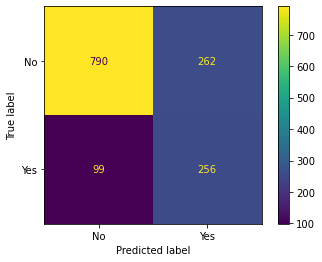

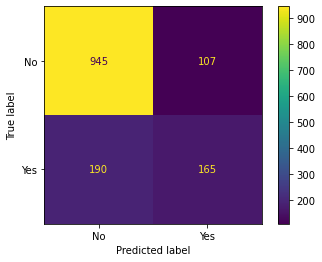

In [189]:

print(compare_models(model,modell,X_test));